In [29]:
import matplotlib.pyplot as plt
import numpy as np
from Functions import JSA
from FunctionsCW import Total_propCW
from scipy.linalg import expm

In [37]:
#Parameters
Np = 0.04 # 0.000002 for low gain which agrees well ish
vp = 0.1  # pump velocity
l = 1.0  # amplification region length
sig = 1  # pump wave packet spread
a = 1.61 / 1.13  # from symmetric grp vel matching

def symmetric_v(vp, sig, l, a):
    vi = vp / (1 - 2 * a * vp / (l * sig))
    vs = vp / (1 + 2 * a * vp / (l * sig))
    return vs, vi

vs, vi = symmetric_v(vp, sig, l, a)


#For numerical FT
nk=801
k_ft = 200/l
dk = k_ft/nk
k = np.arange(-k_ft/2,k_ft/2,dk)

In [38]:
#Defining pump envelope and dispersion relations
ws = vs*k
wi = vi*k
t=np.arange(0,20,0.05)


In [32]:
K = Total_propCW(k,t,ws,wi,Np,l)

In [33]:
J, Ns, Schmidt, M, Nums, Numi = JSA(K,dk)

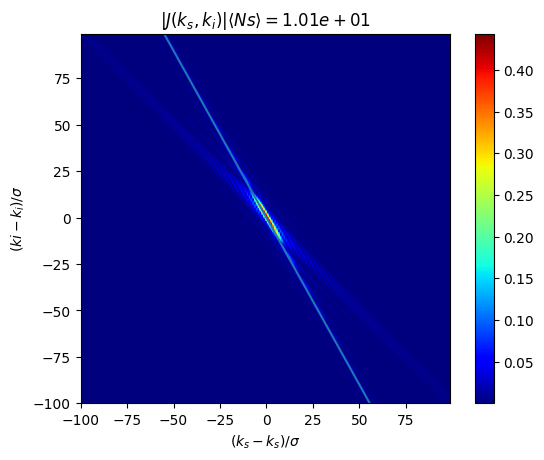

(0.44353348435801154, 10.11891100861526, 5.7697072067772694)

In [6]:
fig, ax = plt.subplots()
im = ax.imshow(J, cmap="jet", origin="lower", extent=[k[0],k[nk-1],k[0],k[nk-1]])
ax.plot(-(vs/vi)*k,k)
ax.set_xlabel(r"$(k_{s}-k_{s})/\sigma$")
ax.set_ylabel(r"$(k{i}-k_{i})/\sigma$")
ax.set_title(r"$|J(k_{s}, k_{i})|    \langle Ns \rangle = %1.2e $" %Ns)
plt.colorbar(im, orientation="vertical")
plt.show()

np.amax(J),Ns,Schmidt

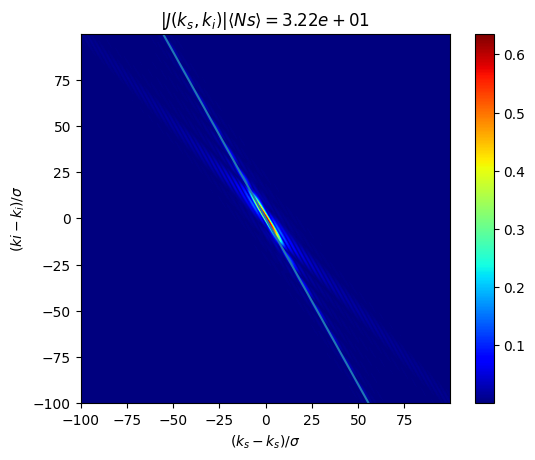

(0.6355143465425045, 32.19650458654549, 5.220520150150356)

In [39]:
Rs = np.diag(-1j*ws)
Ri = np.diag(1j*wi)
S = 1j*(np.sqrt(Np)*l*dk/(2*np.pi))*np.sinc(l*(k+k[:,np.newaxis])/(2*np.pi)) #Extra factors of pi due to np.sinc definition
Q = np.block([[Rs,S],[np.conjugate(S),Ri]])

K = expm(Q*20)

J, Ns, Schmidt, M, Nums, Numi = JSA(K,dk)

fig, ax = plt.subplots()
im = ax.imshow(J, cmap="jet", origin="lower", extent=[k[0],k[nk-1],k[0],k[nk-1]])
ax.plot(-(vs/vi)*k,k)
ax.set_xlabel(r"$(k_{s}-k_{s})/\sigma$")
ax.set_ylabel(r"$(k{i}-k_{i})/\sigma$")
ax.set_title(r"$|J(k_{s}, k_{i})|    \langle Ns \rangle = %1.2e $" %Ns)
plt.colorbar(im, orientation="vertical")
plt.show()

np.amax(J),Ns,Schmidt

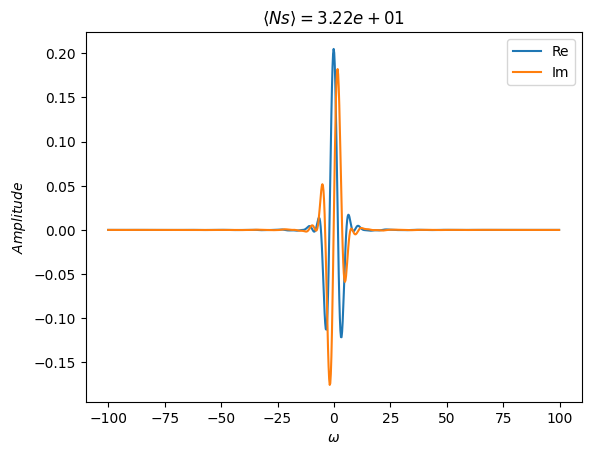

In [40]:
mark=1 #this just takes the first eigenmode of interest. Choose a different value to look at different ones.
val1, u1 = np.linalg.eigh(Nums)

fig, ax1 = plt.subplots()

ax1.plot(k, np.real(np.exp(-1j*np.angle(u1[(nk-1)//2,-mark]))*u1[:,-mark]), label='Re') #Here we multiply by a phase factor such that the imaginary part is 0 at the origin.
ax1.plot(k, np.imag(np.exp(-1j*np.angle(u1[(nk-1)//2,-mark]))*u1[:,-mark]), label='Im')
ax1.set_xlabel(r"$\omega$")
ax1.set_ylabel(r"$Amplitude$")
ax1.set_title(r"$\langle Ns \rangle= %1.2e$" %Ns)
ax1.legend()
plt.show()

In [41]:
#Trying to remove free propagating phases which don't give anything "useful". OK so this is how to do it for single pass
T=K
N = len(T)
ks = -vs
ki = vi
l=t[-1]
Uss = (
    np.diag(np.exp(-1j * ks * k * l / 2))
    @ T[0 : N // 2, 0 : N // 2]
    @ np.diag(np.exp(-1j * ks * k * l / 2))
)
Usi = (
     np.diag(np.exp(-1j * ks * k * l / 2))
    @ T[0 : N // 2, N // 2 : N]
    @ np.diag(np.exp(1j * ki * k * l / 2))
    )
Uiss = (
        np.diag(np.exp(1j * ki * k * l / 2))
        @ T[N // 2 : N, 0 : N // 2]
        @ np.diag(np.exp(-1j * ks * k* l / 2))
    )
Uiis = (
        np.diag(np.exp(1j * ki * k * l / 2))
        @ T[N // 2 : N, N // 2 : N]
        @ np.diag(np.exp(1j * ki * k * l / 2))
    )
U = np.block([[Uss, Usi], [Uiss, Uiis]])

Nums2 = np.conj(Usi) @ Usi.T


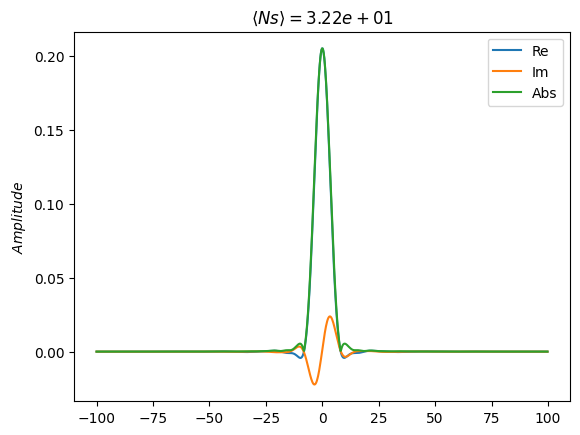

In [45]:
mark=1 #this just takes the first eigenmode of interest. Choose a different value to look at different ones.
val2, u2 = np.linalg.eigh(Nums2)

fig, ax1 = plt.subplots()
ax1.plot(k, np.real(np.exp(-1j*np.angle(u2[(nk-1)//2,-mark]))*u2[:,-mark]), label='Re') #Here we multiply by a phase factor such that the imaginary part is 0 at the origin.
ax1.plot(k, np.imag(np.exp(-1j*np.angle(u2[(nk-1)//2,-mark]))*u2[:,-mark]), label='Im')
ax1.plot(k, np.abs(u2[:,-mark]), label='Abs')
#ax1.plot(x, np.imag(np.exp(-1j*np.angle(u1[(N-1)//2,-mark]))*u1[:,-mark]), label='Im')
#ax1.set_xlabel(r"$\omega$")
ax1.set_ylabel(r"$Amplitude$")
ax1.set_title(r"$\langle Ns \rangle= %1.2e$" %Ns)
ax1.legend()
plt.show()

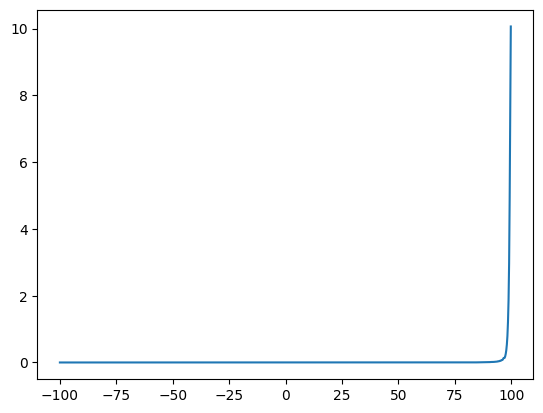

In [46]:
plt.plot(k, val2)

In [47]:
np.sum(val2)

32.19650458654546